<a href="https://colab.research.google.com/github/HaydenJF/CPSC392-Project2/blob/main/Project2_SP22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2

## GENERAL INSTRUCTIONS:

**this is NOT a group project**
- **CLEARLY** mark where you are answering each question (all written questions must be answered in Markdown cells, NOT as comments in code cells)
- Show all code necessary for the analysis, but remove superfluous code

---


# DONUTS

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv),

- **a)** make 3 scatterplots using ggplot to show:
    - `Sodium_100g` vs `Total_Fat_100g`
    - `Sodium_100g` vs. `Sugar_100g`
    - `Sugar_100g` vs `Total_Fat_100g`
    
    You will be graded on the effectiveness of the graphs as well as their content.
    
    
- **b)** Using the scatterplots from part **a** as well as the donuts dataset, **thouroughly discuss which clustering method** (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) **you think would be best for this data and WHY**. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (**mention each of the 4 algorithms at least once**) and how they apply to this specific dataset. (*IN A MARKDOWN CELL*)
    - you should be making statements that both 1) discuss characteristics of the algorithm and 2) specifically discuss how that characteristic applies (or doesn't) to this dataset.

Please note that for this assignment, "It's easier to code" does not count as a valid reason. The reasons should be based on the algorithms/data.


(You must use "\*\*" to make any mention of one of the algorithms bold in your discussion. For example "I think \*\*DBSCAN\*\* is the best algorithm ever!" will make the word "**DBSCAN**" bold in a Markdown cell).

- **c)** **Implement the TWO algorithms** you think will work BEST (1 algo) and WORST (1 algo) here using all 3 variables `Sodium_100g`, `Total_Fat_100g` and `Sugar_100g`, and describe **how you chose any hyperparameters** (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. (*IN A MARKDOWN CELL*)



- **d)** **Thouroughly discuss the performance** of your clustering models. For each algorithm (best and worst): 
    - which metric did you use to asses your model? (*IN A MARKDOWN CELL*)
    - how did your model perform? (*IN A MARKDOWN CELL*)
    - remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (*IN A MARKDOWN CELL*)



- **e)** Choose ONE other of the `_100g` variables from the data set to **add to your clustering model** to improve it.
    - explain why you chose this variable. Either based on improvement in metrics, or outside knowledge you have about food/donuts (*IN A MARKDOWN CELL*)
    - make a new model, identical to the model you thought would be best in part c, but also including your new variable.
    - did this variable improve the fit of your clustering model? How can you tell? (*IN A MARKDOWN CELL*)
    
    
    
Note: The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

In [1]:
# import necessary packages

#imports
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline



from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn import metrics 

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv

%matplotlib inline

In [10]:
db_full = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")
db_full.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


In [11]:
db = db_full[["Sodium_100g", "Total_Fat_100g", "Sugar_100g"]]
print(db.isnull().sum())

db

Sodium_100g       0
Total_Fat_100g    0
Sugar_100g        0
dtype: int64


,Sodium_100g,Total_Fat_100g,Sugar_100g
0,110,19,26
1,437,18,27
2,165,18,20
3,143,17,32
4,386,14,37
...,...,...,...
200,49,1,15
201,48,1,14
202,4,0,9
203,6,0,9


- **a)** make 3 scatterplots using ggplot to show:
    - `Sodium_100g` vs `Total_Fat_100g`
    - `Sodium_100g` vs. `Sugar_100g`
    - `Sugar_100g` vs `Total_Fat_100g`

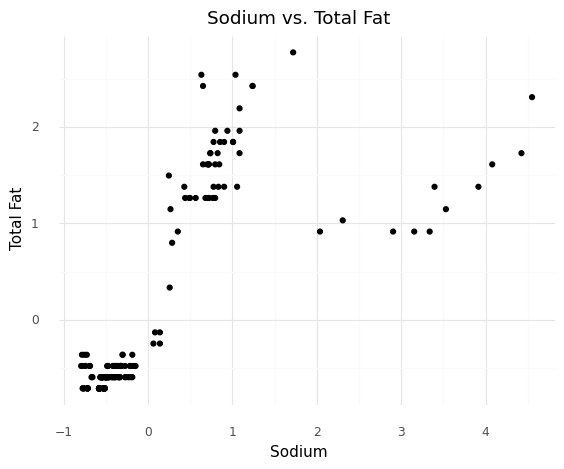

<ggplot: (8775383196533)>


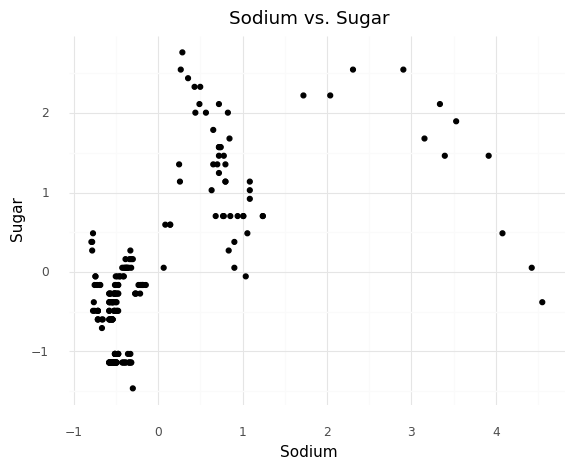

<ggplot: (8775340279969)>


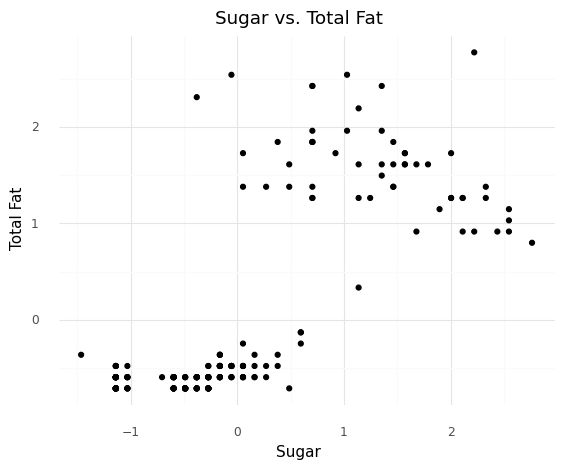

<ggplot: (8775339903001)>


In [3]:
# a
colums = ["Sodium_100g", "Total_Fat_100g", "Sugar_100g"]

X = db

z = StandardScaler()

X[colums] = z.fit_transform(X[colums])

print((ggplot(X, aes(x = "Sodium_100g", y = "Total_Fat_100g")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sodium vs. Total Fat",
             x = "Sodium",
             y = "Total Fat")))
print(ggplot(X, aes(x = "Sodium_100g", y = "Sugar_100g")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sodium vs. Sugar",
             x = "Sodium",
             y = "Sugar"))
print(ggplot(X, aes(x = "Sugar_100g", y = "Total_Fat_100g")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sugar vs. Total Fat",
             x = "Sugar",
             y = "Total Fat"))


- **b)** Using the scatterplots from part **a** as well as the donuts dataset, **thouroughly discuss which clustering method** (KMeans, Gaussian Mixture Models (EM), Hierarchical Clustering, or DBSCAN) **you think would be best for this data and WHY**. Be sure to include discussions of assumptions each algorithm does/does not make, and what types of data they are good/bad for (**mention each of the 4 algorithms at least once**) and how they apply to this specific dataset. (*IN A MARKDOWN CELL*)
    - you should be making statements that both 1) discuss characteristics of the algorithm and 2) specifically discuss how that characteristic applies (or doesn't) to this dataset.

b) 
- **kmeans** creates k clusters.  All circular in shape.  It is really fast but if the data is not circular it is not great.
- **EM** creates k clusters.  All eliptical in shape.  Not as fast as kmeans but the shape doesn't have to be a circle.  Also is unable to determine outliers/noise.
- **DBSCAN** creates clusters based on density and cohession.  Can be any shape.  Can detect noise.  However, it is not good at detecting touching clusters or different density clusters.
- **Hierarchical Clustering** slow but incredibly effective at creating multiple different levels of clusters.  Known for its flexibility.  However it cannot unmerge clusters which can lead to suboptimal clustering.


I believe **kmeans** will be the worst because none of the data looks spherical in shape.

I believe **EM** will be the best.  The data looks extremely elliptical which is good for **EM**.  The other two seem alright but I think **DBSCAN** will be unable to solve the different densities of the data and I have a feeling **Hierarchical Clustering** will do suboptimal clustering due to how the data is shaped especially in sugar vs total fat.

- **c)** **Implement the TWO algorithms** you think will work BEST (1 algo) and WORST (1 algo) here using all 3 variables `Sodium_100g`, `Total_Fat_100g` and `Sugar_100g`, and describe **how you chose any hyperparameters** (such as distance, # of clusters, min_samples, eps, linkage...etc). Make sure to z-score your variables. (*IN A MARKDOWN CELL*)

0.7422190230687878


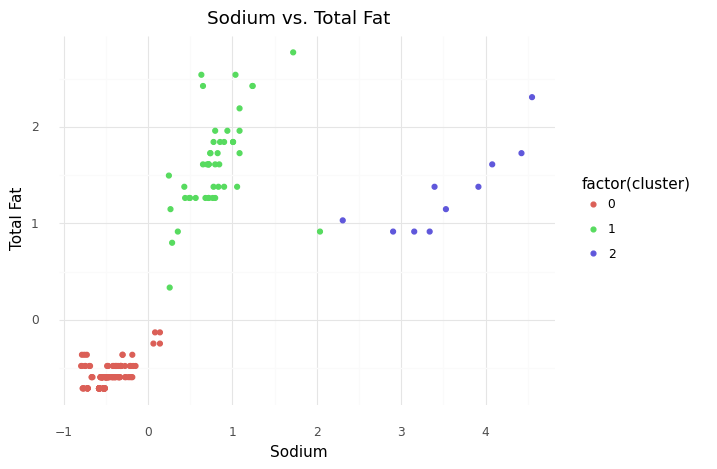

<ggplot: (8775334471453)>


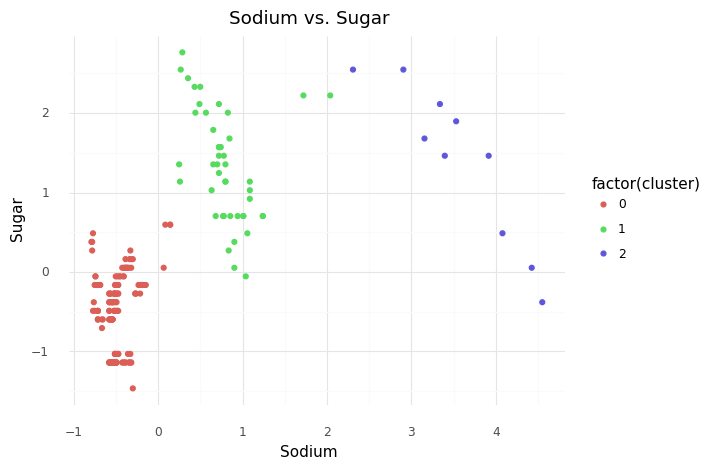

<ggplot: (8775340277289)>


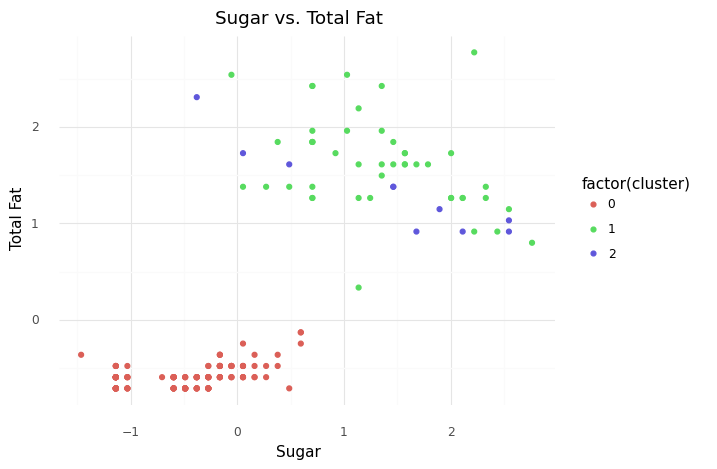

<ggplot: (8775334231829)>


In [9]:
# c
X_km = X
km = KMeans(n_clusters = 3)
km.fit(X_km)

# labels
m_km = km.predict(X_km)

X_km["cluster"] = m_km

# plot
print(silhouette_score(X_km[colums], m_km))


print((ggplot(X_km, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(cluster)")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sodium vs. Total Fat",
             x = "Sodium",
             y = "Total Fat")))
print(ggplot(X_km, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(cluster)")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sodium vs. Sugar",
             x = "Sodium",
             y = "Sugar"))
print(ggplot(X_km, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(cluster)")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sugar vs. Total Fat",
             x = "Sugar",
             y = "Total Fat"))



0.7422190230687878


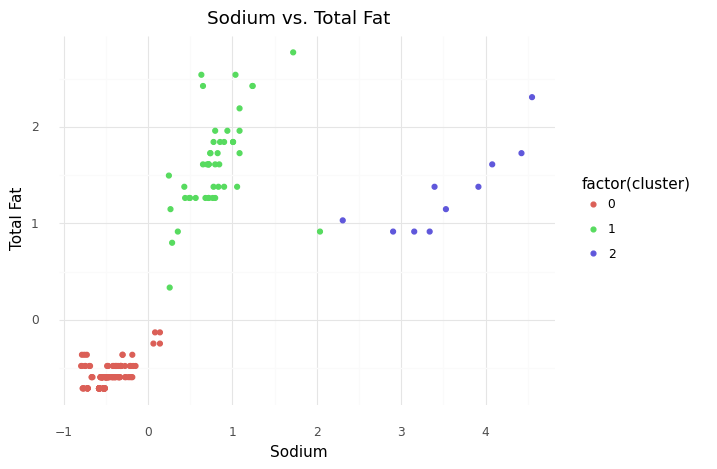

<ggplot: (8775340276057)>


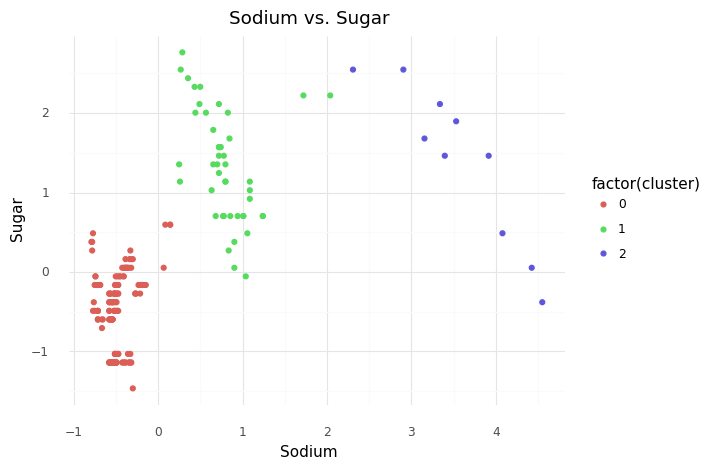

<ggplot: (8775340279845)>


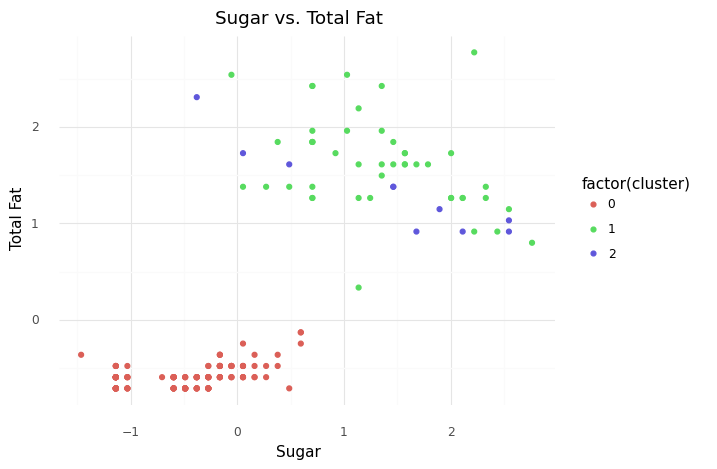

<ggplot: (8775334526653)>


In [5]:
X_em = X

EM = GaussianMixture(n_components = 3)

EM.fit(X_em)

m_em = EM.predict(X)

X_em["cluster"] = m_em

print(silhouette_score(X_em[colums], m_em))

print((ggplot(X_em, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(cluster)")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sodium vs. Total Fat",
             x = "Sodium",
             y = "Total Fat")))
print(ggplot(X_em, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(cluster)")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sodium vs. Sugar",
             x = "Sodium",
             y = "Sugar"))
print(ggplot(X_em, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(cluster)")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sugar vs. Total Fat",
             x = "Sugar",
             y = "Total Fat"))


- describe how you chose any hyperparameters (such as distance, # of clusters, min_samples, eps, linkage...etc)

c)  This data just looks like it has 3 clusters.  I checked with the graphs and I feel pretty confident I am right.

- **d)** **Thouroughly discuss the performance** of your clustering models. For each algorithm (best and worst): 
    - which metric did you use to asses your model? (*IN A MARKDOWN CELL*)
    - how did your model perform? (*IN A MARKDOWN CELL*)
    - remake the 3 graphs from part a, but color by cluster assignment. Describe what characterizes each cluster, and give an example of a label for that cluster (e.g. "these donuts are low fat, and low sugar so I would call these healthy donuts") (*IN A MARKDOWN CELL*)

d)
- I used siluete scoring and the most powerful tool of them all: eye balled it.
- They actually got the exact same results.  A 0.74 siluete score.  They also look fantastic.  Like the logic behind it makes compete sense.  I can't believe how well the kmeans did.  Shows how bad I am at guessing circles.
- The red one is clearly ment to be your healthy donut.  They are lowest fat, lowest sugar and lowest sodium.  The blue one is your heart attack donut, high fat, high sugar and high sodium.  The green one is the one you get if you want to tell the wife you are eating healthy because it has lower sodium.  It has high fat and sugar but it's sodium levels are about average.

- **e)** Choose ONE other of the `_100g` variables from the data set to **add to your clustering model** to improve it.

- Note: The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

In [13]:
#Protein_100g
db2 = db_full[["Sodium_100g", "Total_Fat_100g", "Sugar_100g", "Protein_100g"]]
print(db2.isnull().sum())

Sodium_100g       0
Total_Fat_100g    0
Sugar_100g        0
Protein_100g      0
dtype: int64


0.7154322258592652


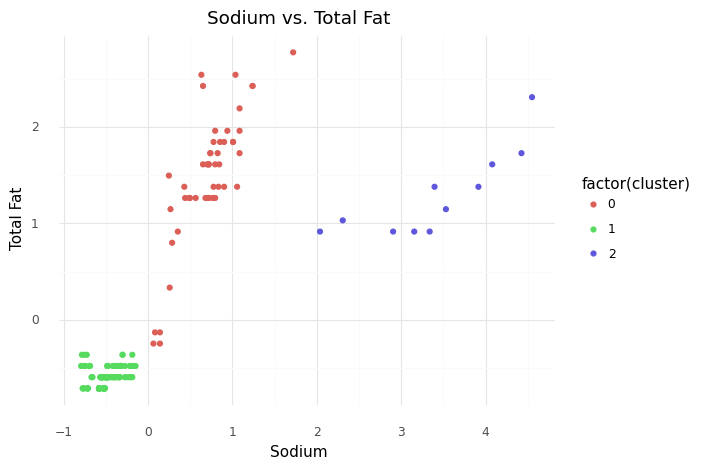

<ggplot: (8775340212797)>


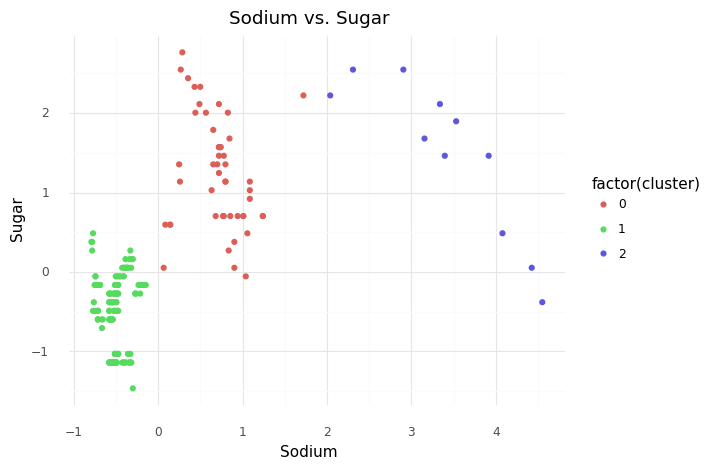

<ggplot: (8775339886693)>


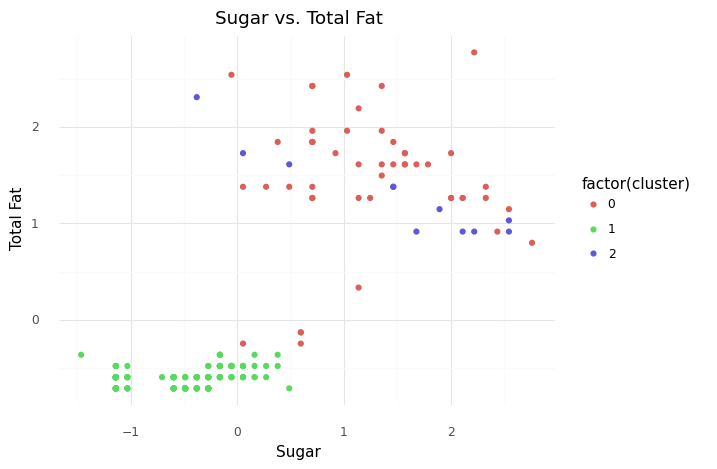

<ggplot: (8775340592937)>


In [14]:
colums2 = ["Sodium_100g", "Total_Fat_100g", "Sugar_100g", "Protein_100g"]

X2 = db2

z = StandardScaler()

X2[colums2] = z.fit_transform(X2[colums2])

X_em2 = X2

EM = GaussianMixture(n_components = 3)

EM.fit(X_em2)

m_em2 = EM.predict(X2)

X_em2["cluster"] = m_em2

print(silhouette_score(X_em2[colums], m_em2))

print((ggplot(X_em2, aes(x = "Sodium_100g", y = "Total_Fat_100g", color = "factor(cluster)")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sodium vs. Total Fat",
             x = "Sodium",
             y = "Total Fat")))
print(ggplot(X_em2, aes(x = "Sodium_100g", y = "Sugar_100g", color = "factor(cluster)")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sodium vs. Sugar",
             x = "Sodium",
             y = "Sugar"))
print(ggplot(X_em2, aes(x = "Sugar_100g", y = "Total_Fat_100g", color = "factor(cluster)")) 
      + geom_point() 
      + theme_minimal() 
      + labs(title = "Sugar vs. Total Fat",
             x = "Sugar",
             y = "Total Fat"))

- 
    - explain why you chose this variable. Either based on improvement in metrics, or outside knowledge you have about food/donuts (*IN A MARKDOWN CELL*)
    - make a new model, identical to the model you thought would be best in part c, but also including your new variable.
    - did this variable improve the fit of your clustering model? How can you tell? (*IN A MARKDOWN CELL*)

e)
- I chose protein because all of the other metrics we used were negative traits.  Fat, Sugar and Sodium are all pretty bad to have in large quantities.  I wanted to see how the model would adjust to having a positive trait, such as protein.
- What's really interesting is it actually reduced the effectiveness of the model (it increased the size of lowish sodium but high fat and sugar).  The siluete score is now 0.71 and visually it seems that there are some outliers in the middle cluster.  This probably means that protein doesn't corrilate very well with fat, sugar and sodium.

Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
Ignore this part.
